In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Problem - To predict disease progression one year after baseline provided 10 features.

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:

- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

In [6]:
# The complete dataset is in a key value pair format
# main data
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
diabetes.data.shape #10 features and 442 obs

(442, 10)

In [8]:
# target variable
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
## all the features
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
## making a df of the data

data = pd.DataFrame(data= diabetes.data, columns= diabetes.feature_names)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


- Everything is transformed, even the categorical variable as well.

In [11]:
## adding the target variable
data['target'] = diabetes.target

In [12]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### Target variable shows how much sugar level changes after one year.

## For Simple Linear Regression now we will take only the BMI as X.

In [13]:
x = data.bmi
y = data.target

In [14]:
## Train -Test split

from sklearn.model_selection import train_test_split

In [15]:
x

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state= 95)

In [17]:
x_train

400    0.045529
200   -0.057941
198    0.054152
28    -0.021295
122    0.081097
         ...   
261   -0.041774
118   -0.010517
19    -0.018062
297   -0.008362
406   -0.080575
Name: bmi, Length: 353, dtype: float64

In [18]:
### Scaling is optional

##Model Training
from sklearn.linear_model import LinearRegression

In [19]:
## Regression Object = Regressor

regressor = LinearRegression()
regressor

LinearRegression()

In [20]:
# training the model
regressor.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [21]:
regressor.coef_

array([[906.95117405]])

In [22]:
regressor.intercept_

array([152.45718341])

In [23]:
y_pred = regressor.predict(np.array(x_test).reshape(-1,1))
y_pred

array([[162.46905283],
       [216.23281375],
       [122.39061287],
       [136.07593384],
       [ 95.01997095],
       [208.41263035],
       [103.81767728],
       [194.72730938],
       [101.86263143],
       [138.03097969],
       [109.68281484],
       [206.45758449],
       [143.89611724],
       [169.31171331],
       [253.37868493],
       [124.34565873],
       [171.26675916],
       [117.50299824],
       [ 99.90758558],
       [166.37914454],
       [156.60391528],
       [165.40162161],
       [266.08648297],
       [ 85.24474169],
       [194.72730938],
       [115.54795239],
       [195.70483231],
       [154.64886943],
       [ 89.1548334 ],
       [160.51400698],
       [178.10941965],
       [156.60391528],
       [105.77272313],
       [140.96354846],
       [148.78373187],
       [208.41263035],
       [217.21033668],
       [169.31171331],
       [129.23327335],
       [131.18831921],
       [214.2777679 ],
       [185.92960305],
       [101.86263143],
       [100

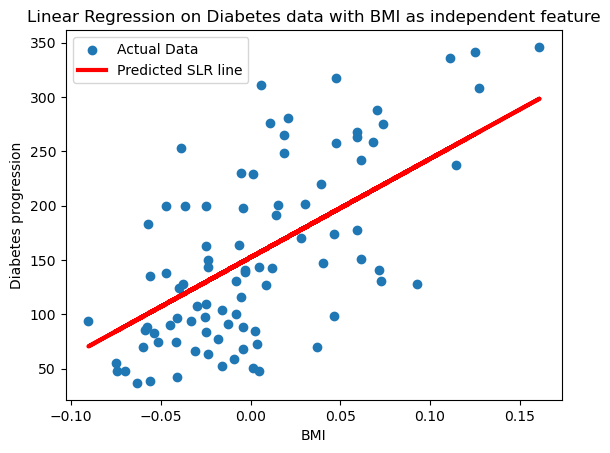

In [24]:
## visualize the y_pred and y_test

plt.scatter(x_test, y_test, label = "Actual Data")
plt.plot(x_test, y_pred, color = "Red", linewidth = 3, label = "Predicted SLR line")
plt.title("Linear Regression on Diabetes data with BMI as independent feature")
plt.xlabel("BMI")
plt.ylabel("Diabetes progression")
plt.legend()
plt.show()

In [25]:
### Model Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (((1 - r2) * (len(y_test) -1)) / (len(y_test) - 1 - 1))

print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R^2 : {r2:.3f}")
print(f"Adjusted R^2 : {adj_r2:.3f}")

MSE : 3864.815
MAE : 52.540
RMSE : 62.168
R^2 : 0.438
Adjusted R^2 : 0.432


### This measures shows that the regression model is not very good. $R^2$ is 0.438 means $56.2%$ of the variation of Increase in Diabetes over a year is **Unexplained** by BMI feature. We can do hypothesis testing to check if there is any significance of the slope, further.